In [1]:
import matplotlib.pyplot as plt
import textwrap
from news_signals import signals
from news_signals.wikidata_utils import search_wikidata

def wrap(text, width=70):
    print('\n'.join(textwrap.wrap(text, width=width)))

def plot_wiki_pageviews_and_events(signal, **kwargs):
    plt.figure(**kwargs)
    signal.timeseries_df['wikimedia_pageviews'].plot()
    for row in signal.feeds_df[~signal.feeds_df['wikipedia_current_events'].isna()].iterrows():
        timestamp = row[0]
        plt.axvline(timestamp, color='red', linestyle='--', linewidth=1)


## Build a Wikimedia Signal

In [2]:
entity_name = 'Xi Jinping'
# search for the Wikidata ID of this entity 
entity = search_wikidata(entity_name)[0]
print('Entity Description:', entity['description'])
print('Wikidata ID:', entity['id'])

wikidata_id = entity['id']

signal = signals.WikimediaSignal(
    name=entity_name,
    wikidata_id=wikidata_id
)

start = '2015-01-01'
end = '2023-12-01'
ts_signal = signal(start, end)

Entity Description: General Secretary of the Chinese Communist Party since 2012
Wikidata ID: Q15031


## Plot Wikimedia Pageviews

<Axes: >

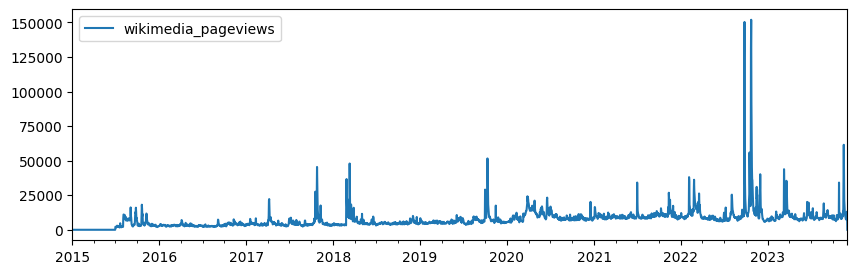

In [3]:
ts_signal.plot(figsize=(10, 3))

## Search Wikipedia Current Events Portal

We store any events in the Wikipedia Current Events Portal if link our entity.

In [4]:
ts_signal.add_wikipedia_current_events()

100%|██████████| 53/53 [00:21<00:00,  2.52it/s]


,wikimedia_pageviews
2015-01-01 00:00:00+00:00,0
2015-01-02 00:00:00+00:00,0
2015-01-03 00:00:00+00:00,0
2015-01-04 00:00:00+00:00,0
2015-01-05 00:00:00+00:00,0
...,...
2023-11-27 00:00:00+00:00,7871
2023-11-28 00:00:00+00:00,11600
2023-11-29 00:00:00+00:00,13075
2023-11-30 00:00:00+00:00,12667


**Inspect event descriptions**

In [5]:
for events in ts_signal.feeds_df['wikipedia_current_events'].values:
    if type(events) == list:
        for event in events:
            print(event['date'].date())
            print(wrap(event['text'], 100))
            # pprint(event)
            print()

2015-02-11
General Secretary of the Central Committee of the Communist Party of China Xi Jinping will make his
first state visit to the United States next September.
None

2015-09-22
Xi Jinping begins his first visit to the United States as President of the People's Republic of
China, meeting with technology company leaders and representatives in Seattle, Washington.
None

2015-10-07
China's Central Commission for Discipline Inspection announces their investigation of Fujian
governor Su Shulin, the former chairman of China Petroleum and Chemical Corporation, on suspicion of
serious disciplinary violations, the "euphemism for corruption." This follows the massive anti-
corruption drive Communist Party general secretary Xi Jinping launched when he came to power more
than three years ago. Su is the first sitting governor investigated since the campaign began.
None

2015-11-07
Mainland China's leader Xi Jinping and Taiwan's leader Ma Ying-jeou meet in Singapore, the first
meeting between a

**Do the events correspond to spikes in pageviews?**

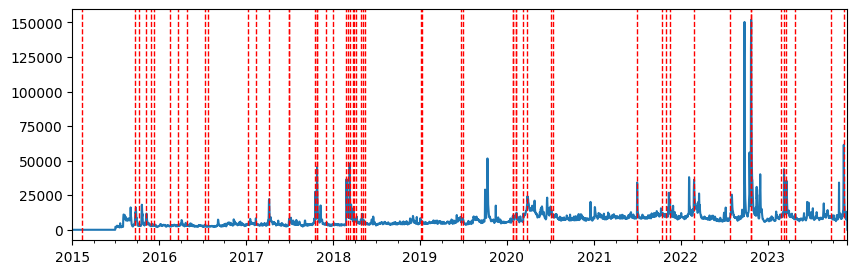

In [6]:
plot_wiki_pageviews_and_events(ts_signal, figsize=(10, 3))

**Is there an event on the day with the highest pageviews of the Wikipedia article?**

In [7]:
highest_pageviews_day = signal.wikimedia_pageviews.idxmax()
highest_pageviews_day

Timestamp('2022-10-23 00:00:00+0000', tz='UTC')

In [8]:
ts_signal.feeds_df['wikipedia_current_events'][highest_pageviews_day]

[{'text': 'Xi Jinping is re-elected as General Secretary of the Chinese Communist Party by the Central Committee, beginning a third term as the paramount leader of China.',
  'id': None,
  'date': datetime.datetime(2022, 10, 23, 0, 0),
  'category': 'Politics and elections',
  'topics': ['https://en.wikipedia.org/wiki/20th_National_Congress_of_the_Chinese_Communist_Party'],
  'wiki_links': ['https://en.wikipedia.org/wiki/Xi_Jinping',
   'https://en.wikipedia.org/wiki/General_Secretary_of_the_Chinese_Communist_Party',
   'https://en.wikipedia.org/wiki/Central_Committee_of_the_Chinese_Communist_Party',
   'https://en.wikipedia.org/wiki/Paramount_leader',
   'https://en.wikipedia.org/wiki/China'],
  'references': ['https://www.aljazeera.com/news/2022/10/23/xi-jinping-secures-historic-third-term-as-chinas-leader']}]